In [1]:
!pip install numpy
!pip install matplotlib
!pip install scikit-learn
!pip install pandas

In [2]:
import numpy as np
from numpy import ndarray

from typing import Callable, Dict, Tuple, List

# Loading datasets and from sklearn library

- fetch_california_housing(): Loads the dataset from scikit-learn.
- california.data: Contains feature values (input variables).
- california.feature_names: Provides column names.
- california.target: Contains the target variable (median house value in $100,000s).
- Creates a pandas.DataFrame with both features and target values.

# Without using pandas

In [3]:
from sklearn.datasets import fetch_california_housing

In [4]:
california = fetch_california_housing(as_frame=True)

In [5]:
data = california.data
target = california.target
features = california.feature_names

In [6]:
print(data[0:2])
print(data.shape)

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127    1.02381       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137    0.97188      2401.0  2.109842     37.86   

   Longitude  
0    -122.23  
1    -122.22  
(20640, 8)


In [7]:
print(target[0: 2])
print(target.shape)
target = target.to_numpy()

0    4.526
1    3.585
Name: MedHouseVal, dtype: float64
(20640,)


In [8]:
print(features[0: 2])
print(features)

['MedInc', 'HouseAge']
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


## Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
data = s.fit_transform(data)

In [10]:
data[0:2]

array([[ 2.34476576,  0.98214266,  0.62855945, -0.15375759, -0.9744286 ,
        -0.04959654,  1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, -0.26333577,  0.86143887,
        -0.09251223,  1.04318455, -1.32284391]])

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=80718)

y_train, y_test = y_train.reshape(-1, 1), y_test.reshape(-1, 1)

In [12]:
y_train[0:5]

array([[2.56 ],
       [1.15 ],
       [1.011],
       [0.952],
       [3.342]])

In [13]:
X_train[0:5]

array([[ 1.29816852e+00, -1.95780625e+00, -2.28473008e-01,
        -5.22512918e-01, -1.54328937e-02, -1.14457444e-02,
        -1.01215449e+00,  9.68166077e-01],
       [ 3.51773092e-02, -6.07018913e-01,  1.26454945e+01,
         1.46806925e+01, -9.61182800e-01, -4.60578445e-02,
        -6.51650830e-01,  1.24767928e+00],
       [-9.52591421e-02, -2.89186599e-01, -5.19494082e-01,
        -4.69347848e-01, -8.13712927e-01, -5.07337884e-03,
         1.37559702e+00, -8.73626269e-01],
       [-5.84632705e-01, -2.09728520e-01,  3.71330629e-02,
        -2.40044504e-02,  2.60079684e-01,  4.90496127e-03,
        -7.59333741e-01,  1.05800961e+00],
       [ 3.50056588e-01, -1.30270442e-01, -1.07885214e-01,
        -1.78187054e-01, -5.42615615e-01, -5.68596498e-02,
        -8.20197995e-01,  5.98809346e-01]])

# Linear Regression from scratch

$$y_i = \beta_0 +\beta_1 \times x_1+\beta_2 \times x_2+...+\beta_n \times x_n+ \epsilon$$

Numeric value of each target is a linear combination of the k-features of X, plus the B0 term to adjust the 'baseline'.

In [14]:
def forward_linear_regression(X_batch: ndarray,
                              y_batch: ndarray,
                              weights: Dict[str, ndarray]
                              )-> Tuple[float, Dict[str, ndarray]]:
    '''
    Forward pass for the step-by-step linear regression.
    '''
    # assert batch sizes of X and y are equal
    assert X_batch.shape[0] == y_batch.shape[0]

    # assert that matrix multiplication can work
    assert X_batch.shape[1] == weights['W'].shape[0]

    # assert that B is simply a 1x1 ndarray
    assert weights['B'].shape[0] == weights['B'].shape[1] == 1

    # compute the operations on the forward pass
    N = np.dot(X_batch, weights['W'])

    P = N + weights['B']

    loss = np.mean(np.power(y_batch - P, 2))

    # save the information computed on the forward pass
    forward_info: Dict[str, ndarray] = {}
    forward_info['X'] = X_batch
    forward_info['N'] = N
    forward_info['P'] = P
    forward_info['y'] = y_batch


## Calculating the gradients 'Maths'

We aim to compute:

$$
\frac{\partial \land}{\partial W} = \frac{\partial \land}{\partial P}(P,Y) \times \frac{\partial \alpha}{\partial N}(N,B) \times \frac{\partial v}{\partial W}(X,W)
$$

where:

1. **Loss function:**
   $$
   \land(P,Y) = (Y - P)^2
   $$
   Differentiating w.r.t.  P:

   $$
   \frac{\partial \land}{\partial P}(P,Y)  =  2 \times (Y-P) \times (-1)  = -2 \times (Y-P)
   $$

2. **Matrix derivative assumption:**
   $$
   \frac{\partial \alpha}{\partial N}(N,B) \text{ is just a matrix of size } N \text{ with all elements } 1
   $$

3. **Matrix multiplication derivative:**
   If \( v = X W \), then:
   $$
   \frac{\partial v}{\partial W} = X^T
   $$

**Final Computation:**
Multiplying these terms together:

$$
\frac{\partial \land}{\partial W} = (-2 \times (Y - P)) \times (\mathbf{1}_N) \times X^T
$$

where $$ {1}_N \text{  is an NxN matrix of ones } $$.

This approach is commonly used in neural networks and machine learning for backpropagation in **linear regression** and **fully connected layers**.

## Calculating the gradients 'Code'

In [15]:
def to_2d_np(a: ndarray, 
             type: str = "col") -> ndarray:
    '''
    Turns a 1D Tensor into 2D
    '''

    assert a.ndim == 1, \
    "Input tensors must be 1 dimensional"
    
    if type == "col":        
        return a.reshape(-1, 1)
    elif type == "row":
        return a.reshape(1, -1)

In [16]:
def permute_data(X: ndarray, y: ndarray):
    '''
    Permute X and y, using the same permutation, along axis=0
    '''
    perm = np.random.permutation(X.shape[0])
    return X[perm], y[perm]

In [17]:
def loss_gradients(forward_info: Dict[str, ndarray],
                   weights: Dict[str, ndarray]) -> Dict[str, ndarray]:
    '''
    Compute dLdW and dLdB for the step-by-step linear regression model.
    '''
    batch_size = forward_info['X'].shape[0]

    dLdP = -2 * (forward_info['y'] - forward_info['P'])

    dPdN = np.ones_like(forward_info['N'])

    dPdB = np.ones_like(weights['B'])

    dLdN = dLdP * dPdN

    dNdW = np.transpose(forward_info['X'], (1, 0))
    
    # need to use matrix multiplication here,
    # with dNdW on the left (see note at the end of last chapter)    
    dLdW = np.dot(dNdW, dLdN)

    # need to sum along dimension representing the batch size:
    # see note near the end of the chapter    
    dLdB = (dLdP * dPdB).sum(axis=0)

    loss_gradients: Dict[str, ndarray] = {}
    loss_gradients['W'] = dLdW
    loss_gradients['B'] = dLdB

    return loss_gradients

In [18]:
Batch = Tuple[ndarray, ndarray]

def generate_batch(X: ndarray, 
                   y: ndarray,
                   start: int = 0,
                   batch_size: int = 10) -> Batch:
    '''
    Generate batch from X and y, given a start position
    '''
    assert X.ndim == y.ndim == 2, \
    "X and Y must be 2 dimensional"

    if start+batch_size > X.shape[0]:
        batch_size = X.shape[0] - start
    
    X_batch, y_batch = X[start:start+batch_size], y[start:start+batch_size]
    
    return X_batch, y_batch

In [19]:
def forward_loss(X: ndarray,
                 y: ndarray,
                 weights: Dict[str, ndarray]) -> Tuple[Dict[str, ndarray], float]:
    '''
    Generate predictions and calculate loss for a step-by-step linear regression
    (used mostly during inference).
    '''
    N = np.dot(X, weights['W'])

    P = N + weights['B']

    loss = np.mean(np.power(y - P, 2))

    forward_info: Dict[str, ndarray] = {}
    forward_info['X'] = X
    forward_info['N'] = N
    forward_info['P'] = P
    forward_info['y'] = y

    return forward_info, loss

In [20]:
def init_weights(n_in: int) -> Dict[str, ndarray]:
    '''
    Initialize weights on first forward pass of model.
    '''
    
    weights: Dict[str, ndarray] = {}
    W = np.random.randn(n_in, 1)
    B = np.random.randn(1, 1)
    
    weights['W'] = W
    weights['B'] = B

    return weights

In [21]:
#X = X_train
#X_test,
#y = y_train
#y_test

In [22]:
"""seed: int = 1
return_losses: bool = False, 
return_weights: bool = False
learning_rate: float = 0.01,
batch_size: int = 100

if seed:
    np.random.seed(seed)
start = 0

# Initialize weights
weights = init_weights(X.shape[1])

# Permute data
X, y = permute_data(X, y)
    
if return_losses:
    losses = []
# Generate batch
if start >= X.shape[0]:
    X, y = permute_data(X, y)
    start = 0
        
X_batch, y_batch = generate_batch(X, y, start, batch_size)
start += batch_size
    
# Train net using generated batch
forward_info, loss = forward_loss(X_batch, y_batch, weights)

if return_losses:
    losses.append(loss)

loss_grads = loss_gradients(forward_info, weights)
for key in weights.keys():
        weights[key] -= learning_rate * loss_grads[key]"""

'seed: int = 1\nreturn_losses: bool = False, \nreturn_weights: bool = False\nlearning_rate: float = 0.01,\nbatch_size: int = 100\n\nif seed:\n    np.random.seed(seed)\nstart = 0\n\n# Initialize weights\nweights = init_weights(X.shape[1])\n\n# Permute data\nX, y = permute_data(X, y)\n    \nif return_losses:\n    losses = []\n# Generate batch\nif start >= X.shape[0]:\n    X, y = permute_data(X, y)\n    start = 0\n        \nX_batch, y_batch = generate_batch(X, y, start, batch_size)\nstart += batch_size\n    \n# Train net using generated batch\nforward_info, loss = forward_loss(X_batch, y_batch, weights)\n\nif return_losses:\n    losses.append(loss)\n\nloss_grads = loss_gradients(forward_info, weights)\nfor key in weights.keys():\n        weights[key] -= learning_rate * loss_grads[key]'

In [23]:
#X[0:3]
#y[0:3]
#weights


In [24]:
#X.shape, y.shape

In [25]:
def train(X: ndarray, 
          y: ndarray, 
          n_iter: int = 1000,
          learning_rate: float = 0.01,
          batch_size: int = 100,
          return_losses: bool = False, 
          return_weights: bool = False, 
          seed: int = 1) -> None:
    '''
    Train model for a certain number of epochs.
    '''
    if seed:
        np.random.seed(seed)
    start = 0

    # Initialize weights
    weights = init_weights(X.shape[1])

    # Permute data
    X, y = permute_data(X, y)
    
    if return_losses:
        losses = []

    for i in range(n_iter):

        # Generate batch
        if start >= X.shape[0]:
            X, y = permute_data(X, y)
            start = 0
        
        X_batch, y_batch = generate_batch(X, y, start, batch_size)
        start += batch_size
    
        # Train net using generated batch
        forward_info, loss = forward_loss(X_batch, y_batch, weights)

        if return_losses:
            losses.append(loss)

        loss_grads = loss_gradients(forward_info, weights)
        for key in weights.keys():
            weights[key] -= learning_rate * loss_grads[key]

    if return_weights:
        return losses, weights
    
    return None

## Training

In [26]:
train_info = train(X_train, y_train,
                   n_iter = 1000,
                   learning_rate = 0.00007,
                   batch_size=100, 
                   return_losses=True, 
                   return_weights=True, 
                   seed=180708)
losses = train_info[0]
weights = train_info[1]

In [27]:
def mae(preds: ndarray, actuals: ndarray):
    '''
    Compute mean absolute error.
    '''
    return np.mean(np.abs(preds - actuals))

def rmse(preds: ndarray, actuals: ndarray):
    '''
    Compute root mean squared error.
    '''
    return np.sqrt(np.mean(np.power(preds - actuals, 2)))

In [28]:
import matplotlib.pyplot as plt

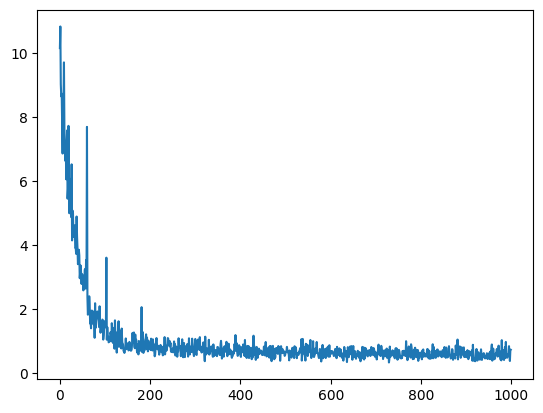

In [29]:
plt.plot(list(range(1000)), losses);

In [30]:
def predict(X: ndarray,
            weights: Dict[str, ndarray]):
    '''
    Generate predictions from the step-by-step linear regression model.
    '''

    N = np.dot(X, weights['W'])

    return N + weights['B']

In [31]:
preds = predict(X_test, weights)

In [32]:
print("Mean absolute error:", round(mae(preds, y_test), 4), "\n"
      "Root mean squared error:", round(rmse(preds, y_test), 4))

Mean absolute error: 0.5539 
Root mean squared error: 0.7404


In [33]:
np.round(y_test.mean(), 4)

2.0715

In [34]:
np.round(rmse(preds, y_test) / y_test.mean(), 4)

0.3574

## Conclusion from custom Linear Regression Model
- RMSE is 231% on average of y. on 0.001 learning rate
- RMSE is 35% on average of y. on 0.0001 learning rate with 100 batch size
- Increasing batch size to 1000 made 34.62%

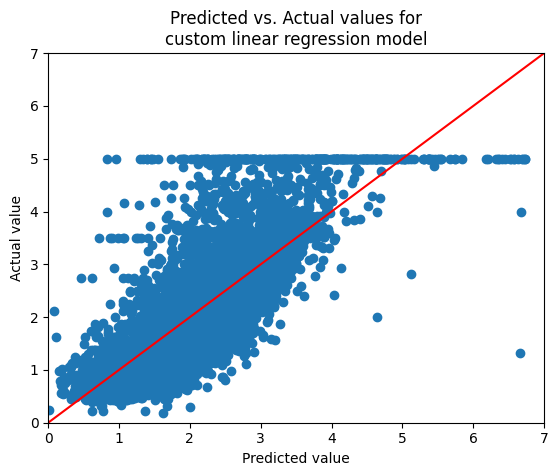

In [35]:
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Predicted vs. Actual values for\ncustom linear regression model");
plt.xlim([0, 7])
plt.ylim([0, 7])
plt.scatter(preds, y_test)
plt.plot([0, 7], [0, 7], 'r');
# plt.savefig(GRAPHS_IMG_FILEPATH + "01_linear_custom_pred_vs_actual.png");

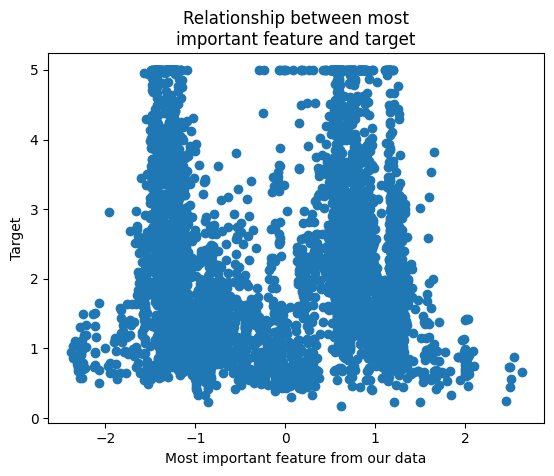

In [36]:
plt.scatter(X_test[:,7], y_test)
plt.xlabel("Most important feature from our data")
plt.ylabel("Target")
plt.title("Relationship between most\nimportant feature and target");

In [37]:
NUM = 40
a = np.repeat(X_test[:,:-1].mean(axis=0, keepdims=True), NUM, axis=0)
b = np.linspace(-1.5, 3.5, NUM).reshape(NUM, 1)

test_feature = np.concatenate([a, b], axis=1)
test_preds = predict(test_feature, weights)[:, 0]

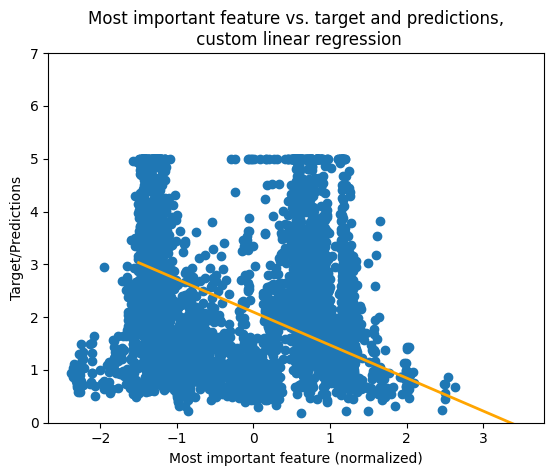

In [38]:
plt.scatter(X_test[:, 7], y_test)
plt.plot(np.array(test_feature[:, -1]), test_preds, linewidth=2, c='orange')
plt.ylim([0, 7])
plt.xlabel("Most important feature (normalized)")
plt.ylabel("Target/Predictions")
plt.title("Most important feature vs. target and predictions,\n custom linear regression");
# plt.savefig(GRAPHS_IMG_FILEPATH + "03_most_important_feature_vs_predictions.png")

In [39]:
np.round(weights['W'].reshape(-1), 4)

array([ 0.6813,  0.1716,  0.1514, -0.0977,  0.0097, -0.0328, -0.6927,
       -0.6246])

In [40]:
np.round(weights['B'], 4)

array([[2.0727]])

## Theoretical relationship between most important feature and target

In [41]:
NUM = 40
a = np.repeat(X_test[:,:-1].mean(axis=0, keepdims=True), NUM, axis=0)
b = np.linspace(-1.5, 3.5, NUM).reshape(NUM, 1)

In [42]:
test_feature = np.concatenate([a, b], axis=1)
preds = predict(test_feature, weights)[:, 0]

(0.0, 6.0)

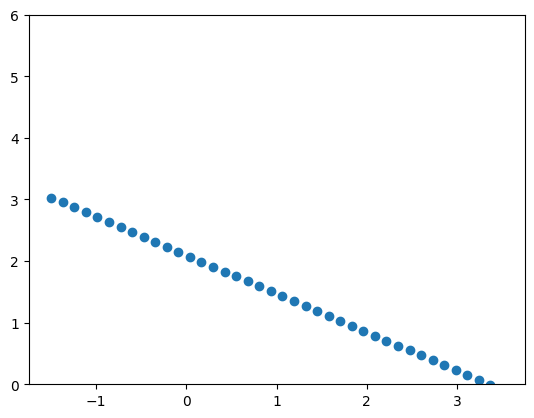

In [43]:
plt.scatter(np.array(test_feature[:, -1]), np.array(preds))
plt.ylim([0, 6])
# plt.savefig(GRAPHS_IMG_FILEPATH + "/04_relationship_most_impt_feat_preds.png")

# Scikit learn model

In [44]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Load California housing dataset
california = fetch_california_housing(as_frame=True)
df = california.frame

# Separate features (X) and target (y)
X = df.drop(columns=["MedHouseVal"])
y = df["MedHouseVal"].values  # Convert Series to NumPy array for reshaping

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use transform() to avoid data leakage

# Convert back to DataFrame (optional)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

# Reshape y_train and y_test
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Print shapes
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train_scaled shape: (16512, 8)
X_test_scaled shape: (4128, 8)
y_train shape: (16512, 1)
y_test shape: (4128, 1)


## Training using sklearn library -> Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train_scaled, y_train)
preds = lr.predict(X_test_scaled)

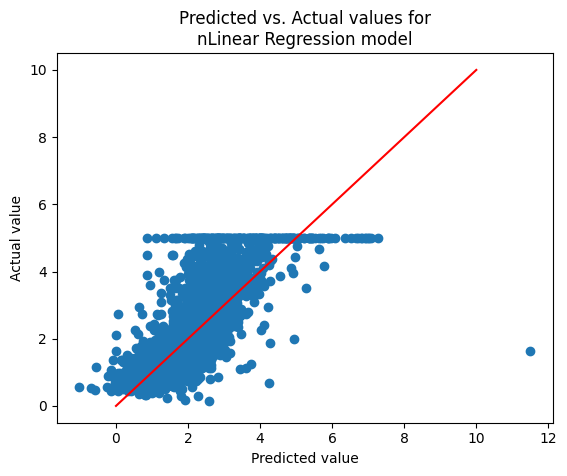

In [46]:
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Predicted vs. Actual values for\nnLinear Regression model")
#plt.xlim([0, 51])
#plt.ylim([0, 51])
plt.scatter(preds, y_test)
plt.plot([0, 10], [0, 10], 'red');
# plt.savefig(IMG_FILEPATH + "00_linear_real_pred_vs_actual.png");

In [47]:
def mae(preds: ndarray, actuals: ndarray):
    '''
    Compute mean absolute error.
    '''
    return np.mean(np.abs(preds - actuals))

def rmse(preds: ndarray, actuals: ndarray):
    '''
    Compute root mean squared error.
    '''
    return np.sqrt(np.mean(np.power(preds - actuals, 2)))

In [48]:
print("Mean absolute error:", round(mae(preds, y_test), 4), "\n"
      "Root mean squared error:", round(rmse(preds, y_test), 4))

Mean absolute error: 0.5332 
Root mean squared error: 0.7456


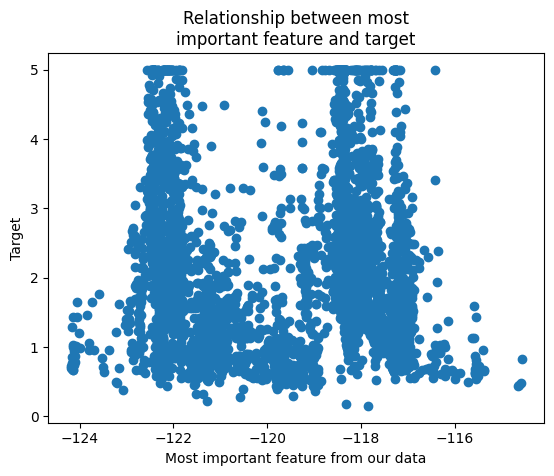

In [49]:
plt.scatter(X_test.iloc[:,7], y_test)
plt.xlabel("Most important feature from our data")
plt.ylabel("Target")
plt.title("Relationship between most\nimportant feature and target");

Non linear relationship

## Coefficients comparison

In [50]:
import numpy as np
np.round(lr.coef_, 4)

array([[ 0.8544,  0.1225, -0.2944,  0.3393, -0.0023, -0.0408, -0.8969,
        -0.8698]])

In [51]:
np.round(lr.intercept_, 4)

array([2.0719])

In [52]:
np.round(weights['W'].reshape(-1), 4)

array([ 0.6813,  0.1716,  0.1514, -0.0977,  0.0097, -0.0328, -0.6927,
       -0.6246])

In [53]:
np.round(weights['B'].reshape(-1), 4)

array([2.0727])

# Data preparation For Neural Net

In [54]:
# importing
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing(as_frame=True)
data = california.data
target = california.target
features = california.feature_names
target = target.to_numpy()

# Scaling
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
data = s.fit_transform(data)

# Spliting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=80718)
y_train, y_test = y_train.reshape(-1, 1), y_test.reshape(-1, 1)

# Neural Network regression

In [55]:
import numpy as np
from numpy import ndarray

from typing import Callable, Dict, Tuple, List
import matplotlib.pyplot as plt

In [56]:
def sigmoid(x: ndarray) -> ndarray:
    return 1 / (1 + np.exp(-1.0 * x))

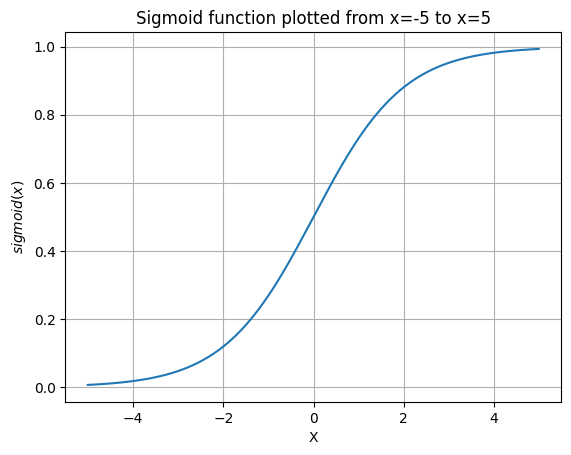

In [57]:
plt.plot(np.arange(-5, 5, 0.01),
         sigmoid(np.arange(-5, 5, 0.01)));
plt.title("Sigmoid function plotted from x=-5 to x=5")
plt.xlabel("X")
plt.ylabel("$sigmoid(x)$");
plt.grid(True)
# plt.savefig(GRAPHS_IMG_FILEPATH + "05_sigmoid_function.png")

In [58]:
def init_weights(input_size: int, 
                 hidden_size: int) -> Dict[str, ndarray]:
    '''
    Initialize weights during the forward pass for step-by-step neural network model.
    '''
    weights: Dict[str, ndarray] = {}
    weights['W1'] = np.random.randn(input_size, hidden_size)
    weights['B1'] = np.random.randn(1, hidden_size)
    weights['W2'] = np.random.randn(hidden_size, 1)
    weights['B2'] = np.random.randn(1, 1)
    return weights

In [59]:
def forward_loss(X: ndarray,
                 y: ndarray,
                 weights: Dict[str, ndarray]
                 ) -> Tuple[Dict[str, ndarray], float]:
    '''
    Compute the forward pass and the loss for the step-by-step 
    neural network model.     
    '''
    M1 = np.dot(X, weights['W1']) # features multiplied with weights

    N1 = M1 + weights['B1'] # adding weight's bias 

    O1 = sigmoid(N1) # pass through non linear sigmoid function
    
    M2 = np.dot(O1, weights['W2']) # second Linear regression matrix multiply

    P = M2 + weights['B2']  # adding final bias 

    loss = np.mean(np.power(y - P, 2)) # MSE calculation

    # storing all the computed in a dictionary
    forward_info: Dict[str, ndarray] = {}
    forward_info['X'] = X
    forward_info['M1'] = M1
    forward_info['N1'] = N1
    forward_info['O1'] = O1
    forward_info['M2'] = M2
    forward_info['P'] = P
    forward_info['y'] = y

    return forward_info, loss

[Activation Functions on Kaggle](https://www.kaggle.com/discussions/getting-started/429326)<br>
[Medium Blog resourece on ANN](https://medium.com/analytics-vidhya/artificial-neural-networks-an-intuitive-approach-part-1-890efac210f0)

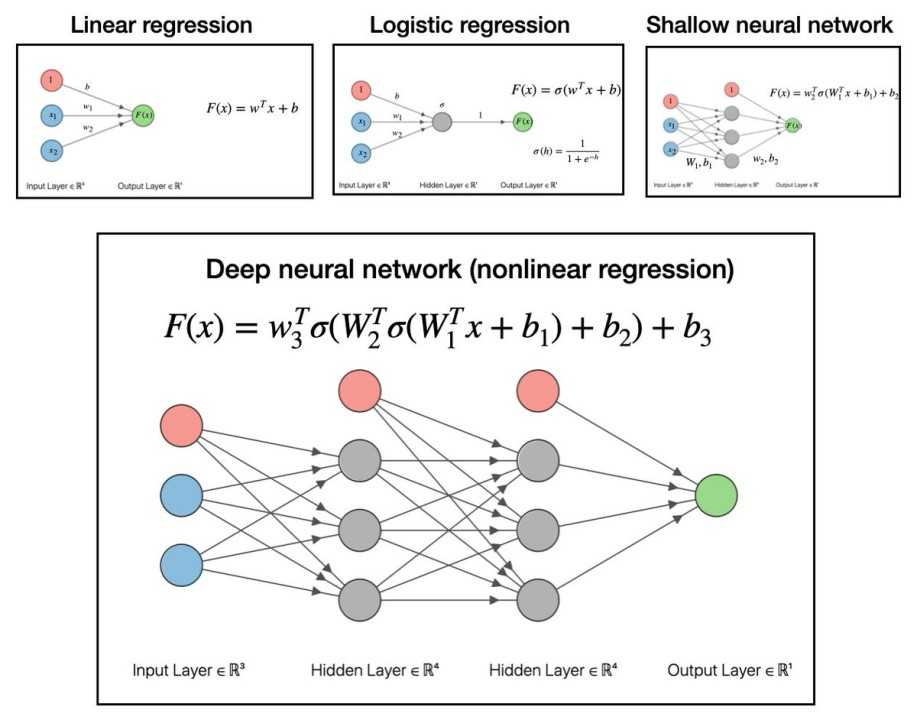

In [60]:
def loss_gradients(forward_info: Dict[str, ndarray], 
                   weights: Dict[str, ndarray]) -> Dict[str, ndarray]:
    '''
    Compute the partial derivatives of the loss with respect to each of the parameters in the neural network.
    '''    
    dLdP = -(forward_info['y'] - forward_info['P'])
    
    dPdM2 = np.ones_like(forward_info['M2'])

    dLdM2 = dLdP * dPdM2
  
    dPdB2 = np.ones_like(weights['B2'])

    dLdB2 = (dLdP * dPdB2).sum(axis=0)
    
    dM2dW2 = np.transpose(forward_info['O1'], (1, 0))
    
    dLdW2 = np.dot(dM2dW2, dLdP)

    dM2dO1 = np.transpose(weights['W2'], (1, 0)) 

    dLdO1 = np.dot(dLdM2, dM2dO1)
    
    dO1dN1 = sigmoid(forward_info['N1']) * (1- sigmoid(forward_info['N1']))
    
    dLdN1 = dLdO1 * dO1dN1
    
    dN1dB1 = np.ones_like(weights['B1'])
    
    dN1dM1 = np.ones_like(forward_info['M1'])
    
    dLdB1 = (dLdN1 * dN1dB1).sum(axis=0)
    
    dLdM1 = dLdN1 * dN1dM1
    
    dM1dW1 = np.transpose(forward_info['X'], (1, 0)) 

    dLdW1 = np.dot(dM1dW1, dLdM1)

    loss_gradients: Dict[str, ndarray] = {}
    loss_gradients['W2'] = dLdW2
    loss_gradients['B2'] = dLdB2.sum(axis=0)
    loss_gradients['W1'] = dLdW1
    loss_gradients['B1'] = dLdB1.sum(axis=0)
    
    return loss_gradients

In [61]:
def predict(X: ndarray, 
            weights: Dict[str, ndarray]) -> ndarray:
    '''
    Generate predictions from the step-by-step neural network model. 
    '''
    M1 = np.dot(X, weights['W1'])

    N1 = M1 + weights['B1']

    O1 = sigmoid(N1)

    M2 = np.dot(O1, weights['W2'])

    P = M2 + weights['B2']    

    return P

In [62]:
def train(X_train: ndarray, y_train: ndarray,
          X_test: ndarray, y_test: ndarray,
          n_iter: int = 1000,
          test_every: int = 1000,
          learning_rate: float = 0.01,
          hidden_size= 13,
          batch_size: int = 100,
          return_losses: bool = False, 
          return_weights: bool = False, 
          return_scores: bool = False,
          seed: int = 1) -> None:

    if seed:
        np.random.seed(seed)

    start = 0

    # Initialize weights
    weights = init_weights(X_train.shape[1], 
                           hidden_size=hidden_size)

    # Permute data
    X_train, y_train = permute_data(X_train, y_train)
    

    losses = []
        
    val_scores = []

    for i in range(n_iter):

        # Generate batch
        if start >= X_train.shape[0]:
            X_train, y_train = permute_data(X_train, y_train)
            start = 0
        
        X_batch, y_batch = generate_batch(X_train, y_train, start, batch_size)
        start += batch_size
    
        # Train net using generated batch
        forward_info, loss = forward_loss(X_batch, y_batch, weights)

        if return_losses:
            losses.append(loss)

        loss_grads = loss_gradients(forward_info, weights)
        for key in weights.keys():
            weights[key] -= learning_rate * loss_grads[key]
        
        if return_scores:
            if i % test_every == 0 and i != 0:
                preds = predict(X_test, weights)
                val_scores.append(r2_score(preds, y_test))

    if return_weights:
        return losses, weights, val_scores
    
    return None

In [63]:
TEST_ALL = True

In [64]:
if "TEST_ALL" in globals() and TEST_ALL:
    num_iter = 10000
    test_every = 1000
    train_info = train(X_train, y_train, X_test, y_test,
                       n_iter=num_iter,
                       test_every = test_every,
                       learning_rate = 0.001,
                       batch_size=23, 
                       return_losses=False, 
                       return_weights=True, 
                       return_scores=False,
                       seed=80718)
    losses = train_info[0]
    weights = train_info[1]
    val_scores = train_info[2]


## learning rate tuning

In [65]:
def r2_score_lr(learning_rate):
    train_info = train(X_train, y_train, X_test, y_test,
                   n_iter=100000,
                   test_every = 100000,
                   learning_rate = learning_rate,
                   batch_size=23, 
                   return_losses=False, 
                   return_weights=True, 
                   return_scores=False,
                   seed=80718)
    weights = train_info[1]
    preds = predict(X_test, weights)
    return r2_score(y_test, preds)

## Evaluating the best model

In [66]:
train_info = train(X_train, y_train, X_test, y_test,
                   n_iter=10000,
                   test_every = 1000,
                   learning_rate = 0.00007,
                   batch_size=100, 
                   return_losses=True, 
                   return_weights=True, 
                   return_scores=False,
                   seed=180807)
losses = train_info[0]
weights = train_info[1]

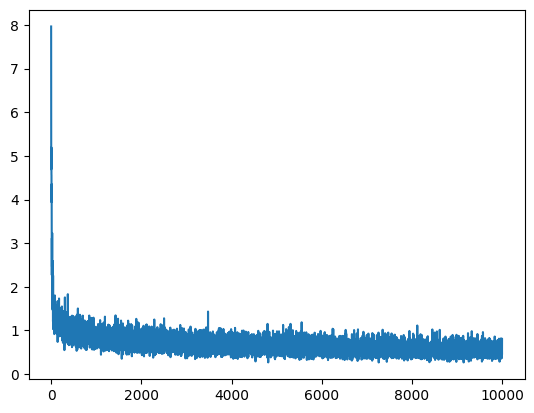

In [67]:
plt.plot(list(range(10000)), losses);

In [68]:
preds = predict(X_test, weights)

In [69]:
weights['W2']

array([[ 0.68194114],
       [ 1.9280344 ],
       [ 1.60872283],
       [-0.65116997],
       [ 0.67722632],
       [ 0.56251259],
       [ 0.52085677],
       [-0.22386722],
       [-0.72367283],
       [ 0.58104011],
       [ 0.04352451],
       [-0.22845539],
       [ 0.80911615]])

In [70]:
weights['W1'][7]

array([ 0.22111573, -1.03115849,  0.10798775, -1.00100962, -0.16250437,
       -3.41757579, -0.75531083,  0.69871367,  2.01173472, -0.22983763,
        0.92110461, -1.0696295 ,  0.49632858])

In [71]:
weights['W1'][6]

array([-0.02549721, -0.92698499, -1.33110714,  0.2929584 , -0.41453476,
        0.03909751,  1.0765804 , -0.25063379, -1.34086018, -0.21138826,
        0.44812108,  1.8719885 ,  0.6676551 ])

In [72]:
print("Mean absolute error:", round(mae(preds, y_test), 4), "\n"
      "Root mean squared error:", round(rmse(preds, y_test), 4))

Mean absolute error: 0.5365 
Root mean squared error: 0.7214


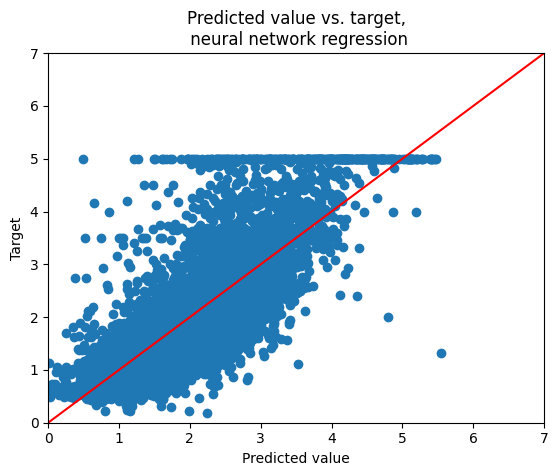

In [73]:
plt.xlabel("Predicted value")
plt.ylabel("Target")
plt.title("Predicted value vs. target,\n neural network regression")
plt.xlim([0, 7])
plt.ylim([0, 7])
plt.scatter(preds, y_test)
plt.plot([0, 7], [0, 7], 'r');
# plt.savefig(GRAPHS_IMG_FILEPATH + "07_neural_network_regression_preds_vs_target.png");

In [74]:
np.round(np.mean(np.array(np.abs(preds - y_test))), 4)

0.5365

In [75]:
np.round(np.mean(np.array(np.power(preds - y_test, 2))), 4)

0.5204